![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




Carguen la base de datos preparada desde la fase 2.

In [1]:
import pandas as pd


In [2]:
ruta_completa = r'C:\Users\juana\Desktop\Cursos Python\HENRY\M6\Proyecto Integrador\Propuesta 1\BBDD_Hospitalización.xlsx'
df = pd.read_excel(ruta_completa)
df

# Mostrar las primeras filas del conjunto de datos
#df.head()


C:\Users\juana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
566,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
567,59.0,NO,NO,9.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import pandas as pd
import numpy as np

# Cargar los datos
ruta_completa = r'C:\Users\juana\Desktop\Cursos Python\HENRY\M6\Proyecto Integrador\Propuesta 1\BBDD_Hospitalización.xlsx'
df = pd.read_excel(ruta_completa)

# Tratar valores faltantes
df.dropna(inplace=True)  # Eliminar filas con valores faltantes

# Tratar duplicados
df.drop_duplicates(inplace=True)  # Eliminar filas duplicadas

# Lista de columnas a codificar
columnas_a_codificar = ['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA', 'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO', 'PATRON DE RESISTENCIA']

# Aplicar one-hot encoding a las columnas seleccionadas
df = pd.get_dummies(df, columns=columnas_a_codificar, drop_first=True)

# Aplicar la transformación logarítmica a la columna 'PSA'
df['PSA'] = np.log1p(df['PSA'])

# Ver valores únicos en las variables categóricas
variables_si = [col for col in df.columns if col.endswith('_SI')]
for variable in variables_si:
    print(f"Valores únicos en la variable '{variable}':")
    print(df[variable].unique())



Valores únicos en la variable 'DIABETES_SI':
[False  True]
Valores únicos en la variable 'HOSPITALIZACIÓN ULTIMO MES_SI':
[False  True]
Valores únicos en la variable 'BIOPSIAS PREVIAS_SI':
[False  True]
Valores únicos en la variable 'VOLUMEN PROSTATICO_SI':
[ True False]
Valores únicos en la variable 'CUP_SI':
[False  True]
Valores únicos en la variable 'ENF. CRONICA PULMONAR OBSTRUCTIVA_SI':
[False  True]
Valores únicos en la variable 'FIEBRE_SI':
[ True False]
Valores únicos en la variable 'ITU_SI':
[False  True]


C:\Users\juana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Separen el dataset en X, y (variable objetivo)

In [4]:
# Imprimir las columnas del DataFrame
print(df.columns)


Index(['EDAD', 'PSA', 'NUMERO DE MUESTRAS TOMADAS',
       'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
       'HOSPITALIZACION', 'DIAS HOSPITALIZACION MQ',
       'DIAS HOSPITALIZACIÓN UPC', 'DIABETES_SI',
       'HOSPITALIZACIÓN ULTIMO MES_SI', 'BIOPSIAS PREVIAS_SI',
       'VOLUMEN PROSTATICO_SI',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_FLUOROQUINOLONA_AMINOGLICOSIDO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_FLUOROQUINOLONA_AMINOGLICÓSIDO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_OROQUINOLONAS',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_OTROS', 'CUP_SI',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA_SI',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA_SI, ASMA',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA_SI, EPOC',
       'BIOPSIA_ADENOCARCINOMA GLEASON 6', 'BIOPSIA_ADENOCARCINOMA GLEASON 6 ',
       'BIOPSIA_ADENOCARCINOMA GLEASON 7', 'BIOPSIA_ADENOCARCINOMA GLEASON 7 ',
       'BIOPSIA_ADENOCARCINOMA GLEASON 8 ',
       'BIOPSIA_A

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Dividir los datos en conjunto de entrenamiento y prueba
X = df.drop('HOSPITALIZACION', axis=1)  # Características
y = df['HOSPITALIZACION']  # Variable objetivo

# Seleccionar otras características para X
X = X[['EDAD', 'PSA', 'DIABETES_SI', 'ITU_SI']]




In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Dividir los datos en conjunto de entrenamiento y prueba
X = df[['EDAD', 'PSA', 'DIABETES_SI', 'ITU_SI']]  # Características 

  # Características
y = df['HOSPITALIZACION']  # Variable objetivo



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar un modelo de regresión logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", precision)

# Mostrar un informe de clasificación detallado
informe = classification_report(y_test, y_pred)
print("Informe de clasificación:\n", informe)


Precisión del modelo: 0.9310344827586207
Informe de clasificación:
               precision    recall  f1-score   support

          NO       0.93      1.00      0.96        81
          SI       0.00      0.00      0.00         6

    accuracy                           0.93        87
   macro avg       0.47      0.50      0.48        87
weighted avg       0.87      0.93      0.90        87



C:\Users\juana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\juana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\juana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

Separen el dataset en X_train, X_test, y_train y y_test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.tree import DecisionTreeClassifier


Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [9]:
profundidad_maxima_arbitraria = 5
arbol_decision = DecisionTreeClassifier(max_depth=profundidad_maxima_arbitraria)


In [10]:
# Importar las bibliotecas necesarias
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividir los datos en conjunto de entrenamiento y prueba
X = df.drop('HOSPITALIZACION', axis=1)  # Características
y = df['HOSPITALIZACION']  # Variable objetivo

# Seleccionar las características para X
X = X[['EDAD', 'PSA', 'DIABETES_SI', 'ITU_SI']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar un modelo de árbol de decisión
arbol_decision = DecisionTreeClassifier(max_depth=5)  # Puedes ajustar la profundidad máxima
arbol_decision.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = arbol_decision.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", precision)


Precisión del modelo: 0.9540229885057471


Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


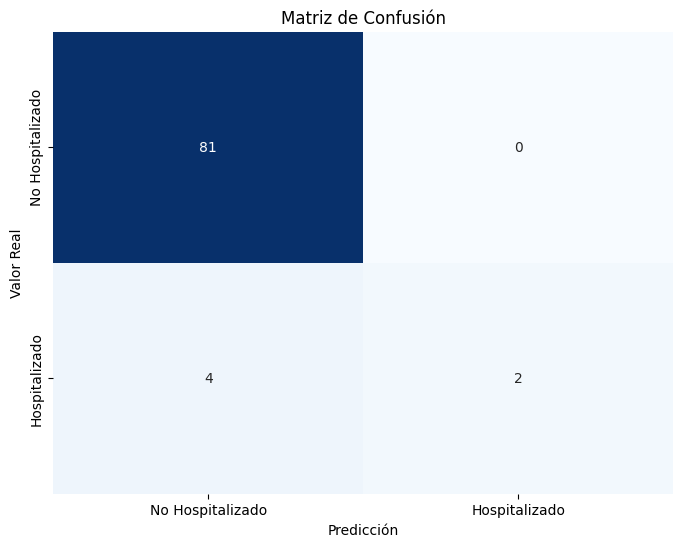

In [12]:
# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["No Hospitalizado", "Hospitalizado"], yticklabels=["No Hospitalizado", "Hospitalizado"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()


Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

In [13]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f'Precisión: {precision:.2f}')

# Calcular el recall del modelo especificando pos_label="SI"
recall = recall_score(y_test, y_pred, pos_label="SI")
print(f'Recall: {recall:.2f}')

# Calcular el F1-Score del modelo especificando pos_label="SI"
f1 = f1_score(y_test, y_pred, pos_label="SI")
print(f'F1-Score: {f1:.2f}')



Precisión: 0.95
Recall: 0.33
F1-Score: 0.50


Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

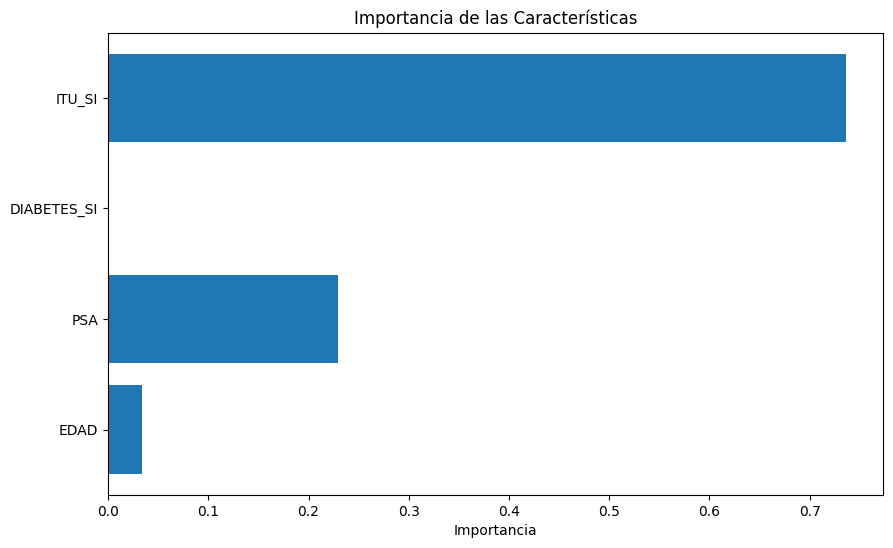

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Crear y entrenar un modelo de Árbol de Decisión
arbol_decision = DecisionTreeClassifier(max_depth=3)  # Puedes ajustar la profundidad del árbol según tus necesidades
arbol_decision.fit(X_train, y_train)

# Obtener la importancia de las características
importancias = arbol_decision.feature_importances_

# Obtener los nombres de las características
nombres_caracteristicas = X.columns

# Crear un gráfico de barras para visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(nombres_caracteristicas, importancias)
plt.xlabel('Importancia')
plt.title('Importancia de las Características')
plt.show()


Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Lista de valores de max_depth 
profundidades = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Lista para almacenar las puntuaciones de validación cruzada
puntuaciones = []

# Itera sobre los valores de max_depth y calcula las puntuaciones
for profundidad in profundidades:
    arbol_decision = DecisionTreeClassifier(max_depth=profundidad)
    puntuacion = cross_val_score(arbol_decision, X, y, cv=5, scoring='accuracy')  # Utiliza la precisión como métrica
    puntuaciones.append(puntuacion.mean())

# Encuentra la profundidad óptima con la mejor puntuación
profundidad_optima = profundidades[puntuaciones.index(max(puntuaciones))]

print(f'Profundidad óptima: {profundidad_optima}')

# Crea y entrena un modelo con la profundidad óptima
modelo_optimo = DecisionTreeClassifier(max_depth=profundidad_optima)
modelo_optimo.fit(X_train, y_train)

# Realiza predicciones con el modelo óptimo
y_pred_optimo = modelo_optimo.predict(X_test)

# Calcula las métricas de evaluación con el modelo óptimo
precision_optima = accuracy_score(y_test, y_pred_optimo)
recall_optima = recall_score(y_test, y_pred_optimo, pos_label="SI")
f1_optima = f1_score(y_test, y_pred_optimo, pos_label="SI")

print(f'Precisión con profundidad óptima: {precision_optima:.2f}')
print(f'Recall con profundidad óptima: {recall_optima:.2f}')
print(f'F1-Score con profundidad óptima: {f1_optima:.2f}')


Profundidad óptima: 1
Precisión con profundidad óptima: 0.95
Recall con profundidad óptima: 0.33
F1-Score con profundidad óptima: 0.50


Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciar el modelo KNN con una cantidad arbitraria de vecinos (k)
k = 5  # Puedes ajustar este valor
modelo_knn = KNeighborsClassifier(n_neighbors=k)

# Entrenar el modelo con los datos de entrenamiento
modelo_knn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_knn = modelo_knn.predict(X_test)


Encuentre el valor óptimo para k

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Lista de valores de k que deseas probar
valores_k = list(range(1, 21))  # Puedes ajustar este rango según tus necesidades

# Lista para almacenar las puntuaciones de validación cruzada
puntuaciones = []

# Itera sobre los valores de k y calcula las puntuaciones
for k in valores_k:
    modelo_knn = KNeighborsClassifier(n_neighbors=k)
    puntuacion = cross_val_score(modelo_knn, X, y, cv=5, scoring='accuracy')  # Utiliza la precisión como métrica
    puntuaciones.append(puntuacion.mean())

# Encuentra el valor óptimo de k con la mejor puntuación
k_optimo = valores_k[puntuaciones.index(max(puntuaciones))]

print(f'Valor óptimo para k: {k_optimo}')


Valor óptimo para k: 2


Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

In [18]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Modelo de Árbol de Decisión con profundidad óptima
arbol_decision_optimo = DecisionTreeClassifier(max_depth=profundidad_optima)
arbol_decision_optimo.fit(X_train, y_train)
y_pred_arbol_optimo = arbol_decision_optimo.predict(X_test)

# Modelo K-Vecinos más Cercanos con k óptimo
modelo_knn_optimo = KNeighborsClassifier(n_neighbors=k_optimo)
modelo_knn_optimo.fit(X_train, y_train)
y_pred_knn_optimo = modelo_knn_optimo.predict(X_test)

# Calcular métricas para el modelo de Árbol de Decisión óptimo
precision_arbol_optimo = accuracy_score(y_test, y_pred_arbol_optimo)
recall_arbol_optimo = recall_score(y_test, y_pred_arbol_optimo, pos_label="SI")
f1_arbol_optimo = f1_score(y_test, y_pred_arbol_optimo, pos_label="SI")

# Calcular métricas para el modelo de K-Vecinos más Cercanos óptimo
precision_knn_optimo = accuracy_score(y_test, y_pred_knn_optimo)
recall_knn_optimo = recall_score(y_test, y_pred_knn_optimo, pos_label="SI")
f1_knn_optimo = f1_score(y_test, y_pred_knn_optimo, pos_label="SI")

# Imprimir las métricas
print("Métricas para el Árbol de Decisión óptimo:")
print(f'Precisión: {precision_arbol_optimo:.2f}')
print(f'Recall: {recall_arbol_optimo:.2f}')
print(f'F1-Score: {f1_arbol_optimo:.2f}')
print()
print("Métricas para el modelo K-Vecinos más Cercanos óptimo:")
print(f'Precisión: {precision_knn_optimo:.2f}')
print(f'Recall: {recall_knn_optimo:.2f}')
print(f'F1-Score: {f1_knn_optimo:.2f}')


Métricas para el Árbol de Decisión óptimo:
Precisión: 0.95
Recall: 0.33
F1-Score: 0.50

Métricas para el modelo K-Vecinos más Cercanos óptimo:
Precisión: 0.93
Recall: 0.00
F1-Score: 0.00


De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

Para mejorar el rendimiento del modelo de clasificación K-Vecinos más Cercanos (KNN):

1. **Selección de Características**: Realiza una evaluación exhaustiva de las características utilizadas en el modelo. Elimina las características irrelevantes o redundantes, lo que puede mejorar la precisión y reducir el ruido en el modelo.

2. **Normalización de Datos**: KNN es sensible a la escala de las características. Asegúrate de normalizar o estandarizar tus datos para que todas las características tengan la misma importancia.

3. **Selección de Hiperparámetros**: Experimenta con diferentes valores de `k`. Encontrar el valor óptimo de `k` puede tener un impacto significativo en el rendimiento. Utiliza técnicas como la validación cruzada para seleccionar el mejor valor de `k`.

4. **Manejo de Datos Desbalanceados**: Si se tiene un conjunto de datos desbalanceado, donde una clase tiene muchas más muestras que la otra, considera técnicas de remuestreo, como submuestreo o sobremuestreo, para equilibrar las clases.

5. **Optimización de Distancia**: Experimenta con diferentes métricas de distancia (por ejemplo, la distancia Euclidiana, la distancia de Mahalanobis, etc.) para encontrar la que funcione mejor para tu conjunto de datos.

6. **Eliminación de Ruido**: Identifica y elimina valores atípicos (outliers) que puedan afectar negativamente el rendimiento del modelo.

7. **Reducción de la Dimensión**: Utiliza técnicas de reducción de la dimensión, como Análisis de Componentes Principales (PCA), para reducir la complejidad de los datos y mejorar el rendimiento.

8. **Aumento de Datos**: Si tienes un conjunto de datos pequeño, considera técnicas de aumento de datos para generar más ejemplos de entrenamiento sintéticos.

9. **Validación Cruzada y Ajuste de Hiperparámetros**: Utiliza la validación cruzada para ajustar los hiperparámetros del modelo y evitar el sobreajuste.

10. **Ensemble Learning**: Puedes combinar varios modelos KNN en un ensemble, como Random Forest o Gradient Boosting, para mejorar el rendimiento general.

11. **Evaluación de Otras Métricas**: Además de las métricas estándar (precisión, recall, F1-score), considera otras métricas específicas del dominio o del problema que puedan ser relevantes.



R/